<a href="https://colab.research.google.com/github/mamarezz/Dbscan-Algorithm/blob/main/DBSCAN_mamrez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import csv


class DBSCAN:

	def __init__(self, D, eps, MinPts):
		self.D = D
		self.labels = [0]*len(D)
		self.C = 0
		self.eps = eps
		self.MinPts = MinPts


	def displayDataset(self):
		for i in range(0, len(self.D)):
			print (i+1, "	", self.D[i])
		print("")


	def runDBSCAN(self):
		for P in range(0, len(self.D)):
			if not (self.labels[P] == 0):
				continue
			NeighborPts = self.regionQuery(P)
			if len(NeighborPts) < self.MinPts:
				self.labels[P] = -1
			else:
				self.C += 1
				self.labels[P] = self.C
				self.growCluster(P)


	def growCluster(self, P):
		SearchQueue = [P]
		i = 0
		while i < len(SearchQueue):
			P = SearchQueue[i]
			NeighborPts = self.regionQuery(P)
			if len(NeighborPts) < self.MinPts:
				i += 1
				continue
			for Pn in NeighborPts:
				if self.labels[Pn] == -1:
					self.labels[Pn] = self.C
				elif self.labels[Pn] == 0:
					self.labels[Pn] = self.C
					SearchQueue.append(Pn)
			i += 1



	def regionQuery(self, P):
		neighbors = []
		for Pn in range(0, len(self.D)):
			if self.EuclideanDistance(self.D[P], self.D[Pn]) < self.eps:
				neighbors.append(Pn)
		return neighbors


	def EuclideanDistance(self, pt1, pt2):
		sum = 0
		distance = 0
		for i in range(len(pt1)):
			sum += (pt1[i] - pt2[i])**2
		distance = sum**(1/2)
		return distance


	def createClusterList(self):
		ClusterList = []
		for i in range(0, self.C):
			cluster = []
			for j in range(0, len(self.labels)):
				if self.labels[j] == i+1:
					cluster.append(self.D[j])
			ClusterList.append(cluster)
		return ClusterList


	def createNoiseList(self):
		NoiseList = []
		for i in range(0, len(self.labels)):
			if self.labels[i] == -1:
				NoiseList.append(self.D[i])
		return NoiseList


	def displayClusters(self):
		ClusterList = self.createClusterList()
		for cluster in ClusterList:
			print("Cluster", ClusterList.index(cluster)+1,)
			for item in cluster:
				print(item)
			print("")


	def displayNoise(self):
		NoiseList = self.createNoiseList()
		for noise in NoiseList:
			print(noise)
		print("")


def dataRead(FileName):
	D = []
	with open(FileName, 'r') as f:
		reader = csv.reader(f)
		for row in reader:
			A = []
			for data in row:
				A.append(float(data))
			D.append(A)
	return D

In [ ]:

import matplotlib.pyplot as plt


def plot(ClusterList, NoiseList):
	i = 0
	color = ['b', 'g', 'r', 'c', 'm', 'y']
	for cluster in ClusterList:
		x = []
		y = []
		for item in cluster:
			x.append(item[0])
			y.append(item[1])
		plt.plot(x, y, color[i]+".")
		i += 1
	x = []
	y = []
	for noise in NoiseList:
		x.append(noise[0])
		y.append(noise[1])
	plt.plot(x, y, color[i]+".")
	plt.axis([0, 200, 0, 200])
	plt.show()



Importing csv file /content/DBSCAN_data.csv ...
IMPORTING COMPLETE

The input dataset for our clustering is:
1 	 [68.126832, 161.6752]
2 	 [44.914873, 75.058858]
3 	 [106.19347, 142.42085]
4 	 [162.24187, 120.27887]
5 	 [161.20629, 119.60703]
6 	 [161.66116, 116.45059]
7 	 [160.81865, 120.43772]
8 	 [161.49271, 118.91925]
9 	 [164.75859, 121.33459]
10 	 [163.53175, 122.37478]
11 	 [159.58886, 118.22116]
12 	 [163.03078, 116.18466]
13 	 [157.20546, 121.18857]
14 	 [156.16201, 118.28134]
15 	 [157.90938, 115.49903]
16 	 [160.581, 119.65721]
17 	 [158.3429, 118.01477]
18 	 [159.44691, 120.55184]
19 	 [160.95882, 122.2483]
20 	 [160.36963, 119.30043]
21 	 [161.84871, 117.76451]
22 	 [162.08668, 118.59442]
23 	 [159.30307, 122.2322]
24 	 [162.7191, 118.53772]
25 	 [163.03479, 116.38809]
26 	 [164.50065, 113.19134]
27 	 [165.76116, 117.09145]
28 	 [162.84564, 114.7918]
29 	 [161.01057, 113.32571]
30 	 [166.88161, 117.24191]
31 	 [164.04552, 115.53597]
32 	 [159.46112, 118.31983]
33 	 [158.8

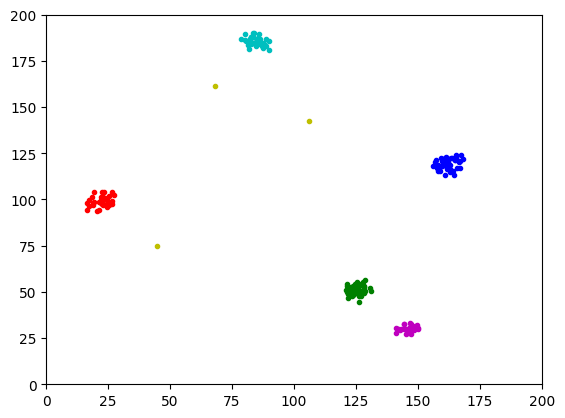

In [ ]:

def main():
	FileName = '/content/DBSCAN_data.csv'
	eps = 5
	MinPts = 2
	print("\nImporting csv file", FileName, "...")
	D = dataRead(FileName)
	print("IMPORTING COMPLETE\n")
	obj = DBSCAN(D, eps, MinPts)
	print("The input dataset for our clustering is:")
	obj.displayDataset()
	print("Running DBSCAN clustering...")
	obj.runDBSCAN()
	print("CLUSTERING COMPLETE\n")
	print("The clusters are:")
	obj.displayClusters()
	print("The noise obtained after clustering are:")
	obj.displayNoise()
	ClusterList = obj.createClusterList()
	NoiseList = obj.createNoiseList()
	plot(ClusterList, NoiseList)

main()